## Loading time-indexed data from a database

In the `data` directory you will find a database file called `global_temperatures.db` which contains a table called `temperatures`. 

#### Exercise 1

**(a)** Load the `global_temperatures.db` database and display fields available in this database. 

To do this you will need to:
- define the database service
- define a connectable string
- define a query
- load the dataset
- print some summary information

In [1]:
database_service = "sqlite"
database = "data/global_temperatures.db"
connectable = f"{database_service}:///{database}"

In [4]:
query = "SELECT * FROM temperatures"

In [7]:
import pandas as pd

global_temperatures = pd.read_sql(query, connectable)
global_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


**(b)** Create a new database query to select only information on average land temperature (central value and uncertainty) and time (indicated in the `dt` column). Load the corresponding dataset.

In [9]:
new_query = "SELECT LandAverageTemperature, dt FROM temperatures"

In [24]:
avg_temp = pd.read_sql(new_query, connectable)

#### Exercise 2

**(a)** What is the data type of the `dt` column? What do the first few rows look like? Add code to the cells below to find out.

In [25]:
import numpy as np
print(np.dtype(avg_temp["dt"]))

object


In [26]:
avg_temp["dt"].head()

0    1750-01-01
1    1750-02-01
2    1750-03-01
3    1750-04-01
4    1750-05-01
Name: dt, dtype: object

**(b)** The `dt` column is of type `object` and appears to have format `YYYY-MM-DD`. 
- Convert the `dt` column to `datetime` format.
    - This can be done using the `pd.to_datetime()` function: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    - Remember to specify the `format` argument to ensure that the date is interpreted correctly.
- Make this column the _index_ of the DataFrame using `set_index`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- Print the first few rows of the DataFrame to see the effect of these actions.

In [27]:
avg_temp["dt"] = pd.to_datetime(avg_temp["dt"], format="%Y/%m/%d")

In [28]:
avg_temp = avg_temp.set_index("dt")
avg_temp

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


#### Exercise 3

This dataset contains data from as early as the year 1750. Suppose we'd like to focus on data from the year 1950 onwards. Create a new DataFrame that contains only records where the year is 1951 or later. Once done, print some summary information to confirm that you were successful.

_Hint: you can access the year from the date time index by using `<DataFrame_name>.index.year`_

In [35]:
filtered_avg_temp = avg_temp[avg_temp.index.year > 1950]
filtered_avg_temp

,LandAverageTemperature
dt,
1951-01-01,2.138
1951-02-01,2.332
1951-03-01,5.091
1951-04-01,8.367
1951-05-01,11.438
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


#### Exercise 4

**(a)** Plot the average land temperature as a function of time using `matplotlib`. 
- Remember to provide axis labels.
- When creating the plot using `plt.subplots()` use the `figsize` argument to set the figure size dimensions `(14,4)`.

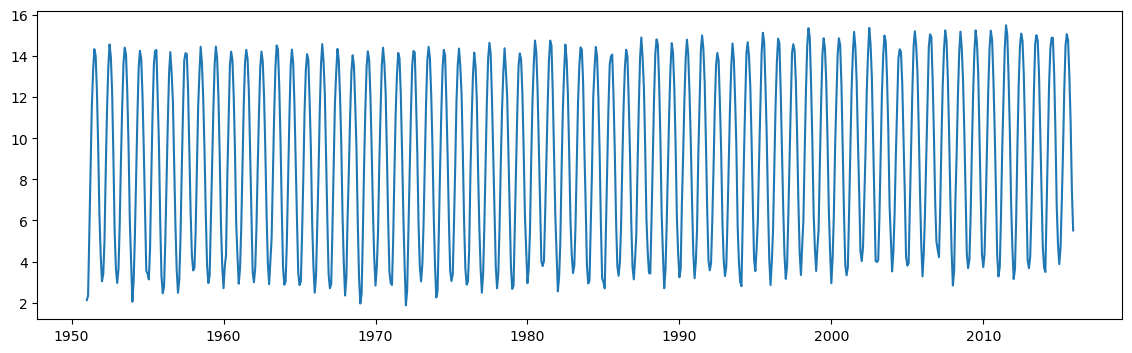

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,4))

ax.plot(filtered_avg_temp.index, filtered_avg_temp["LandAverageTemperature"])

In the above plot we can see a seasonal variation in temperature as one might expect. It also looks as though there is a global upwards trend in average temperature over time. This trend might be more apparent if we _resampled_ the data so that we less frequent observations. 

**(b)** Create a new DataFrame with the data resampled such that the data is available at yearly intervals.

In [39]:
new_sample = filtered_avg_temp.resample("1Y").mean()

**(c)** Plot this newly sampled dataset. Is there a distinct upward trend in the annual data?

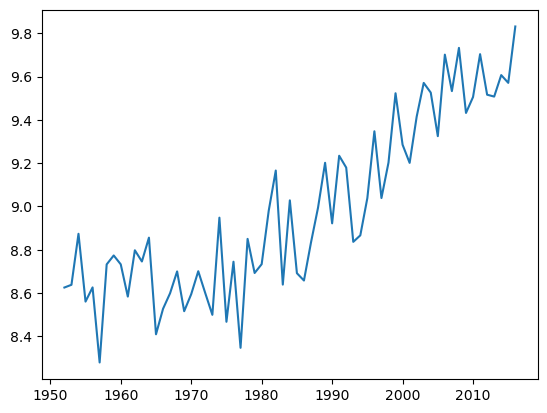

In [40]:
fig, ax = plt.subplots()

ax.plot(new_sample.index, new_sample["LandAverageTemperature"])

**(d)** Use the `seaborn` library to perform a quick regression analysis of this distribution. Based on the _residuals_ resulting from this procedure, do you think a linear regression would capture the this upward trend, or does it look as though there could be higher order features?  

To do this, first add a new column to your resampled DataFrame called `year` and set the values of this column to the year of the date time index.

_Hint: To access the year from the date time index you can use the same syntax that you used in Exercise 3._

In [41]:
import seaborn as sns
new_sample["year"] = new_sample.index.year

<Axes: xlabel='year', ylabel='LandAverageTemperature'>

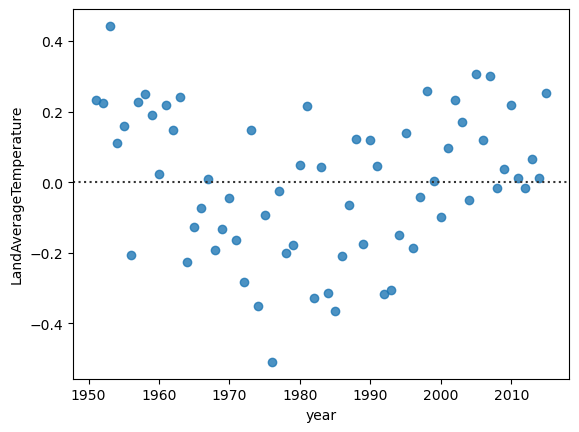

In [44]:
sns.residplot(data=new_sample,x="year",y="LandAverageTemperature")

<Axes: xlabel='year', ylabel='LandAverageTemperature'>

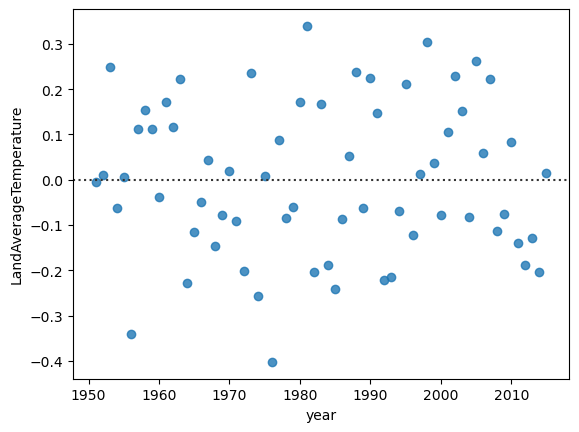

In [45]:
sns.residplot(data=new_sample,x="year",y="LandAverageTemperature",order=2)